In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [12]:
churn = pd.read_csv("./churn_modelling.csv")

In [13]:
# H0 -> Will the customer exit?
churn.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [14]:
churn[churn['IsActiveMember'] == 1].head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0
14,15,15600882,Scott,635,Spain,Female,35,7,0.00,2,1,1,65951.65,0
15,16,15643966,Goforth,616,Germany,Male,45,3,143129.41,2,0,1,64327.26,0
17,18,15788218,Henderson,549,Spain,Female,24,9,0.00,2,1,1,14406.41,0
19,20,15568982,Hao,726,France,Female,24,6,0.00,2,1,1,54724.03,0


In [28]:
X_churn = churn.iloc[:, 3:-1].values
y_churn = churn.iloc[:, -1].values

print(X_churn)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [29]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
X_churn[:, 2] = encoder.fit_transform(X_churn[:, 2])
print(X_churn[2])

[502 'France' 0 42 8 159660.8 3 1 0 113931.57]


In [30]:
# One Hot Encoding the "Geography" column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X_churn = np.array(ct.fit_transform(X_churn))

In [31]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_churn, y_churn, train_size=0.9)

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

In [33]:
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_scaled, y_train)

    print('Accuracy of K-NN classifier on training set: {:.2f}'
         .format(knn.score(X_train_scaled, y_train)))

    print('Accuracy of K-NN classifier on test set: {:.2f}'
         .format(knn.score(X_test_scaled, y_test)))

    y_pred = knn.predict(X_test_scaled)

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.78
Accuracy of K-NN classifier on training set: 0.89
Accuracy of K-NN classifier on test set: 0.81
Accuracy of K-NN classifier on training set: 0.89
Accuracy of K-NN classifier on test set: 0.81
Accuracy of K-NN classifier on training set: 0.86
Accuracy of K-NN classifier on test set: 0.81
Accuracy of K-NN classifier on training set: 0.87
Accuracy of K-NN classifier on test set: 0.81
Accuracy of K-NN classifier on training set: 0.85
Accuracy of K-NN classifier on test set: 0.81
Accuracy of K-NN classifier on training set: 0.85
Accuracy of K-NN classifier on test set: 0.82
Accuracy of K-NN classifier on training set: 0.84
Accuracy of K-NN classifier on test set: 0.82
Accuracy of K-NN classifier on training set: 0.84
Accuracy of K-NN classifier on test set: 0.81


In [35]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Model has accuracy percentage of: ")
accuracy_score(y_test, y_pred)


[[764  34]
 [155  47]]
Model has accuracy percentage of: 


0.811

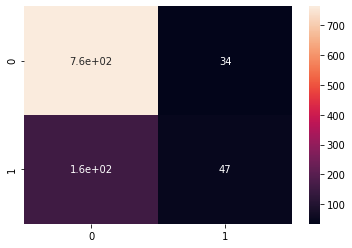

In [36]:
import seaborn as sns 
sns.heatmap(cm, annot=True)

## Dummy Classifiers

In [37]:
from sklearn.dummy import DummyClassifier

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train_scaled, y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test)

dummy_majority.score(X_test, y_test)

0.798

In [38]:
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(n_neighbors = 13)
cv_scores = cross_val_score(clf, X_churn, y_churn, cv=10)

print('Cross-validation scores (10-fold):', cv_scores)
print('Mean cross-validation score (10-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores (10-fold): [0.791 0.794 0.781 0.792 0.797 0.79  0.785 0.791 0.795 0.786]
Mean cross-validation score (10-fold): 0.790


In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred)))

Accuracy: 0.81
Precision: 0.58
Recall: 0.23
F1: 0.33


In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['not 1', '1']))

              precision    recall  f1-score   support

       not 1       0.83      0.96      0.89       798
           1       0.58      0.23      0.33       202

    accuracy                           0.81      1000
   macro avg       0.71      0.60      0.61      1000
weighted avg       0.78      0.81      0.78      1000

